### Exercice 1

In [49]:
from traffic_env import TrafficEnvironment

env = TrafficEnvironment()
state = env.reset()

for _ in range(10):
    action = 0
    next_state, reward = env.step(action)
    print(f"Etat : {next_state}, Recompense : {reward}")

Etat : [2 2 4 5], Recompense : 4
Etat : [2 0 5 6], Recompense : 3
Etat : [2 0 7 6], Recompense : 2
Etat : [1 1 7 8], Recompense : 2
Etat : [0 0 8 8], Recompense : 2
Etat : [0 1 8 9], Recompense : 0
Etat : [1 1 9 9], Recompense : 1
Etat : [0 0 9 9], Recompense : 2
Etat : [2 1 9 9], Recompense : 0
Etat : [0 1 9 9], Recompense : 3


### Exercice 2

In [50]:
import numpy as np

q_table = np.zeros((10, 10, 10, 10, 2))
#q_table = np.zeros((env.observation_space.n, env.action_space.n))

### Q-Learning

In [56]:
alpha = 0.1  #vitesse l'agent apprend.Valeur de 0.1 -> l'agent met à jour ses connaissances à 10%
# de la différence entre l'ancienne et la nouvelle estimation.

gamma = 0.9  # l'importance des récompenses futures.valeur de 0.99 -> l'agent valorise récompenses futures

epsilon = 1.0  # Contrôle la probabilité que l'agent explore.  epsilon est à 1.0 -> l'agent explore beaucoup

epsilon_decay = 0.995  # Réduit progressivement epsilon après chaque épisode

num_episodes = 1000  # Nombre total de fois que l'agent va jouer dans l'environnement pour apprendre

max_steps = 100  # On limite chaque épisode à 100 étapes

# Liste pour stocker les récompenses par épisode
rewards_per_episode = []

for episode in range(num_episodes): # exécute l'apprentissage sur un nombre fixe d'épisodes (num_episodes).
    state = env.reset() # réinitialise l'environnement
    done = False
    total_reward = 0
    
    for step in range(max_steps):  # Boucle bornée
        # choisir l'action
        if np.random.rand() < epsilon:
            action = np.random.choice([0, 1]) # choisit une action aléatoire (exploration)
        else:
            # choisit l'action avec la valeur Q la plus élevée pour l'état actuel (exploitation)
            action = np.argmax(q_table[tuple(state)])  # Convertir state en tuple
            #action = np.argmax(q_table[state])
        
        # exécute l'action choisie par l'agent et observe le nouvel état, la récompense
        next_state, reward = env.step(action)
        total_reward += reward
        
        # Assurer que state reste entre 0 et 9
        #state = np.clip(state, 0, 9).astype(int)
        #next_state = np.clip(next_state, 0, 9).astype(int)

        # met à jour la Q-Table avec la formule de Q-Learning.Combine la récompense immédiate et la récompense future estimée pour améliorer les décisions de l'agent        
        # Mettre à jour la Q-Table
        q_table[tuple(state) + (action,)] = q_table[tuple(state) + (action,)] + alpha * (
            reward + gamma * np.max(q_table[tuple(next_state)]) - q_table[tuple(state) + (action,)]
        )
        #q_table[state, action] = q_table[state, action] + alpha * (reward + gamma * np.max(q_table[next_state]) - q_table[state, action])
        
        # L'agent passe à l'état suivant pour continuer à explorer ou exploiter l'environnement
        state = next_state
    
    # epsilon est réduit pour que l'agent explore moins et exploite plus au fur et à mesure qu'il apprend
    epsilon *= epsilon_decay
    
    # Stocker la récompense totale de l'épisode
    rewards_per_episode.append(total_reward)

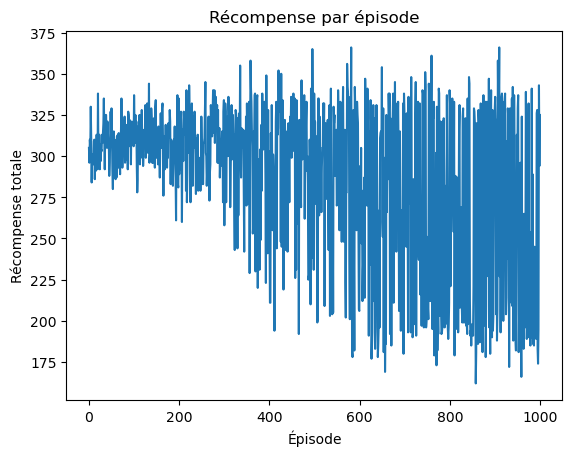

In [57]:
# Tracer la récompense par épisode
plt.plot(rewards_per_episode)
plt.xlabel("Épisode")
plt.ylabel("Récompense totale")
plt.title("Récompense par épisode")
plt.show()

### EXERCICE 3

In [58]:
import numpy as np

q_table2 = np.zeros((10, 10, 10, 10, 2))
#q_table = np.zeros((env.observation_space.n, env.action_space.n))

### SARSA

In [59]:
alpha = 0.1  # Taux d'apprentissage
gamma = 0.9  # Facteur de réduction
epsilon = 1.0  # Taux d'exploration initial
epsilon_decay = 0.995  # Décroissance d'epsilon
num_episodes = 1000  # Nombre d'épisodes d'apprentissage
max_steps = 100  # Limite d'étapes par épisode

# Environnement
env = TrafficEnvironment()

# Liste pour stocker les récompenses par épisode
rewards_per_episode2 = []

# Boucle d'apprentissage
for episode in range(num_episodes):
    state = env.reset()
    done = False
    total_reward2 = 0
    
    # Choisir la première action
    if np.random.rand() < epsilon:
        action = np.random.choice([0, 1])  # Exploration
    else:
        action = np.argmax(q_table2[tuple(state)])  # Exploitation
    
    for step in range(max_steps):
        # Exécuter l'action et observer le nouvel état et la récompense
        next_state, reward = env.step(action)
        total_reward2 += reward
        
        # Choisir la prochaine action (next_action) en utilisant la même politique
        if np.random.rand() < epsilon:
            next_action = np.random.choice([0, 1])  # Exploration
        else:
            next_action = np.argmax(q_table2[tuple(next_state)])  # Exploitation
        
        # Mettre à jour la Q-Table avec la formule SARSA
        q_table2[tuple(state) + (action,)] = q_table2[tuple(state) + (action,)] + alpha * (
            reward + gamma * q_table2[tuple(next_state) + (next_action,)] - q_table2[tuple(state) + (action,)]
        )
        
        # Passer à l'état et à l'action suivants
        state = next_state
        action = next_action
    
    # Réduire epsilon pour diminuer l'exploration au fil du temps
    epsilon *= epsilon_decay
    
    # Stocker la récompense totale de l'épisode
    rewards_per_episode2.append(total_reward2)

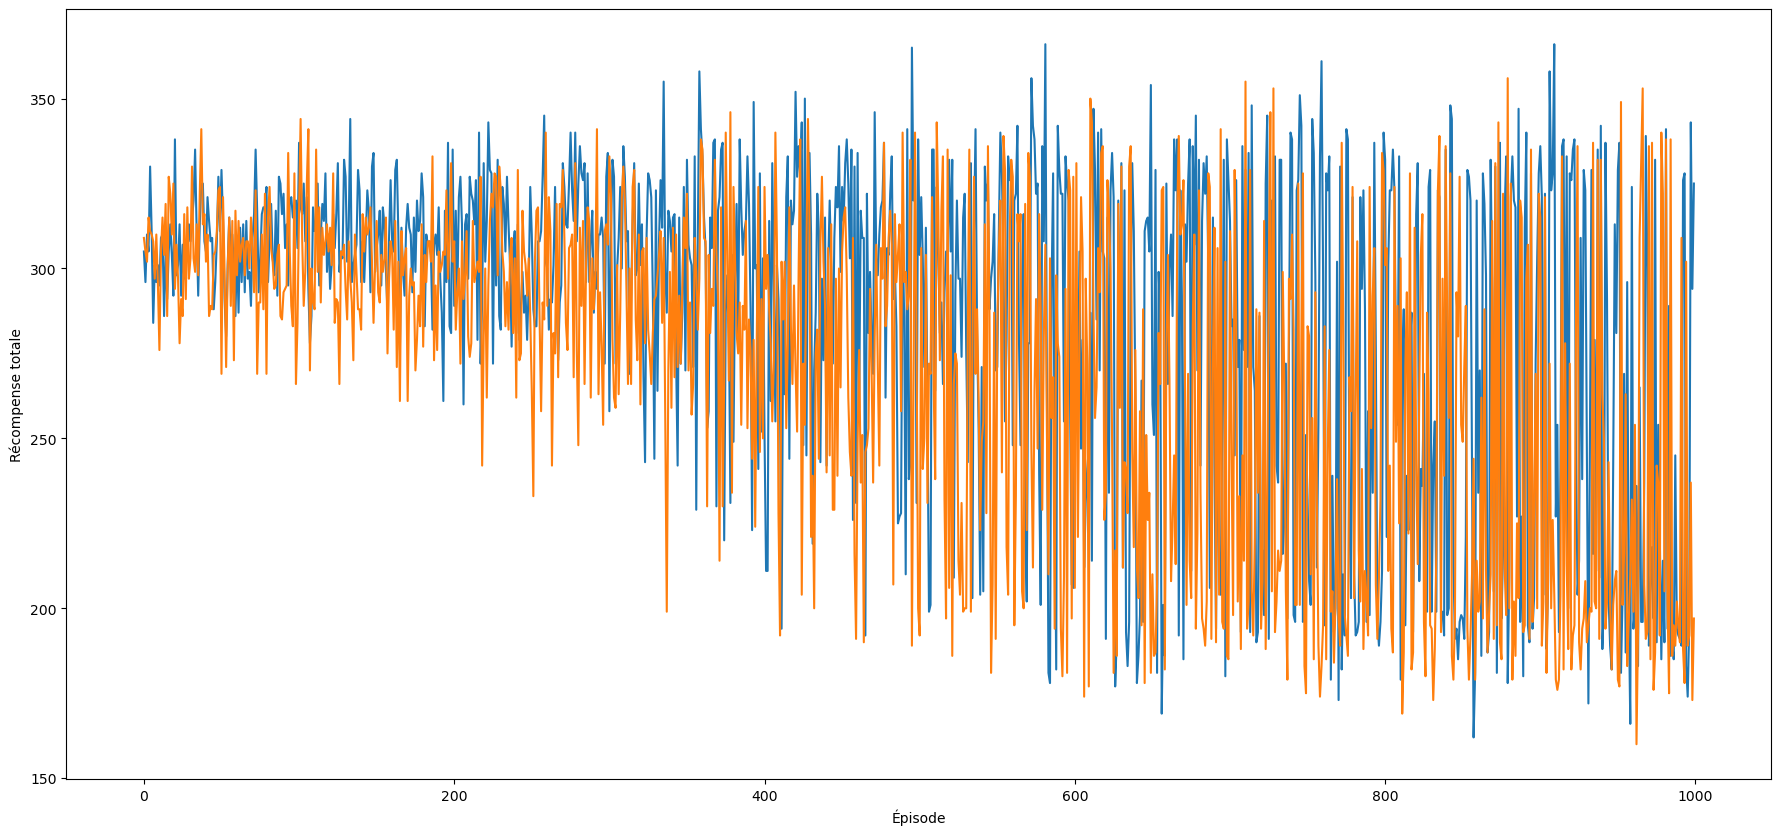

In [60]:
# Tracer la récompense par épisode
plt.figure(figsize=(22,10))
plt.plot(rewards_per_episode, label="Q-Learning")
plt.plot(rewards_per_episode2, label="SARSA")
plt.xlabel("Épisode")
plt.ylabel("Récompense totale")
plt.show()